In [518]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [442]:
df = pd.read_csv(r"C:\Users\jjjib\Desktop\Projects\FlipRobo\Car Price 31-03\Data_Car.csv")

# Data Understanding

In [443]:
#Visualizing the dataset 
df.head()

,Unnamed: 0,Brand,Model,Variant,Year,Location,Ownership,KM Driven,Fuel,Transmission,Price
0,0,Maruti,Ignis,1.2 AMT Zeta BSIV,2021,HR,1st,"3,010",Petrol,Automatic,"7,21,000"
1,1,Maruti,Alto,LXi,2020,UP,1st,"7,326",Petrol,Manual,"3,82,000"
2,2,Maruti,Baleno,1.2 Zeta,2019,HR,1st,"17,032",Petrol,Manual,"7,13,000"
3,3,Toyota,Innova,2.8 ZX AT BSIV,2017,HR,1st,"83,409",Diesel,Automatic,"19,76,000"
4,4,Hyundai,Grand,Magna,2017,DL,2nd,"17,032",Petrol,Manual,"4,36,000"


In [444]:
#Basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5113 non-null   int64 
 1   Brand         5113 non-null   object
 2   Model         5113 non-null   object
 3   Variant       5109 non-null   object
 4   Year          5113 non-null   int64 
 5   Location      5113 non-null   object
 6   Ownership     5113 non-null   object
 7   KM Driven     5113 non-null   object
 8   Fuel          5113 non-null   object
 9   Transmission  5090 non-null   object
 10  Price         5113 non-null   object
dtypes: int64(2), object(9)
memory usage: 439.5+ KB


Here we note that, there are null values present in the data set in two columns 'Variant' and 'Transmission'. Also, the column 'price' should be a float type instead of the shown object type. We shall treat for it in the EDA.

In [445]:
#Converting non number data into nullvalues
df = df.replace('-',np.NAN)

In [446]:
df.isnull().sum()

Unnamed: 0       0
Brand            0
Model            5
Variant          9
Year             0
Location         5
Ownership        5
KM Driven        0
Fuel             0
Transmission    85
Price            0
dtype: int64

In [447]:
df.columns #Calling all the column names of the dataset

Index(['Unnamed: 0', 'Brand', 'Model', 'Variant', 'Year', 'Location',
       'Ownership', 'KM Driven', 'Fuel', 'Transmission', 'Price'],
      dtype='object')

In [448]:
df.shape #Looking into the shape of the dataset

(5113, 11)

In [449]:
df.isnull().sum() #Checking for null values again

Unnamed: 0       0
Brand            0
Model            5
Variant          9
Year             0
Location         5
Ownership        5
KM Driven        0
Fuel             0
Transmission    85
Price            0
dtype: int64

<AxesSubplot:>

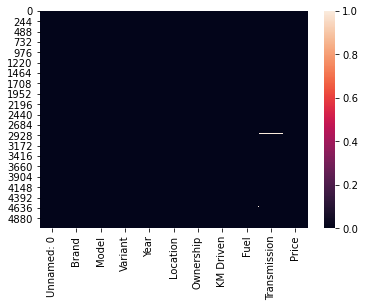

In [450]:
sns.heatmap(df.isnull()) #Visualization of null values

# Exploratory Data Analysis

We drop the unnamed column as it is just present as an index

In [451]:
df.drop(columns='Unnamed: 0',inplace=True)

Let us now look into all the columns one at a time, beginning with the target column price

In [452]:
#Converting Price column into numerical values
for i in range(0,len(df['Price'])):
    try:
        df['Price'][i] = float(df['Price'][i])*100000
    except:
        df['Price'][i] = df['Price'][i].replace(',','')
        df['Price'][i] = df['Price'][i].replace('*','')

In [453]:
#Converting into float type 
df['Price'] = df['Price'].astype(float)

<AxesSubplot:xlabel='Price'>

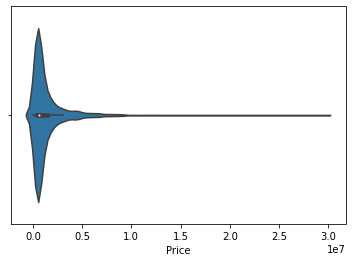

In [454]:
#Data visualization of the target column
sns.violinplot(df['Price'])

Next column we look into is the 'Brand' 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'Hyundai'),
  Text(3, 0, 'Renault'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Bmw'),
  Text(7, 0, 'Mercedes-benz'),
  Text(8, 0, 'Jeep'),
  Text(9, 0, 'Honda'),
  Text(10, 0, 'Skoda'),
  Text(11, 0, 'MG'),
  Text(12, 0, 'Datsun'),
  Text(13, 0, 'Tata'),
  Text(14, 0, 'Nissan'),
  Text(15, 0, 'Mahindra'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Mitsubishi'),
  Text(21, 0, 'Mg'),
  Text(22, 0, 'Porsche'),
  Text(23, 0, 'Land'),
  Text(24, 0, 'Volvo'),
  Text(25, 0, 'Isuzu'),
  Text(26, 0, 'Mini'),
  Text(27, 0, 'Mercedes-Benz'),
  Text(28, 0, 'Maserati'),
  Text(29, 0, 'Bentley'),
  Text(30, 0, 'Force'),
  Text(31, 0, 'BMW'),
  Text(32, 0, 'Mercedes')

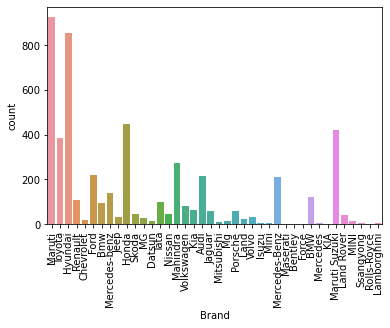

In [455]:
#Data visualization of the column
sns.countplot(df['Brand'])
plt.xticks(rotation=90)

In [456]:
df['Brand'].nunique()

40

We see few brands have been repeated, we shall treat them

In [457]:
df['Brand'] = df['Brand'].replace({'Mercedes-benz':'Mercedes-Benz', 'Mercedes':'Mercedes-Benz', 'Mg':'MG', 'Land':'Land Rover', 'Mini':'MINI', 'Maruti':'Maruti Suzuki'})

Next column we look into is the 'Model'

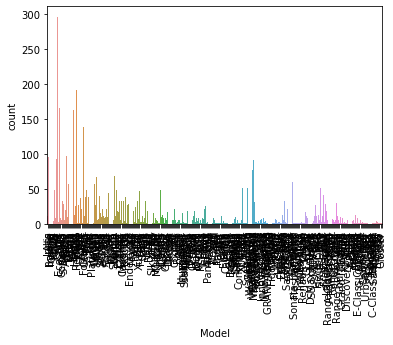

In [458]:
#Data visualization of the column
plt.plot(figsize=(100,50))
sns.countplot(df['Model'])
plt.xticks(rotation=90)
plt.show()

In [459]:
#Finding number of unique values
df['Model'].unique()

array(['Ignis', 'Alto', 'Baleno', 'Innova', 'Grand', 'EON', 'i20', 'KWID',
       'Ciaz', 'Swift', 'Cruze', 'Ecosport', 'Z4', 'Gls', 'Compass',
       'Santro', 'S-Presso', 'Etios', 'Amaze', 'WR-V', 'Ertiga', 'Brio',
       'Verna', 'Vitara', 'Creta', 'Rapid', 'Hector', 'City', 'RediGO',
       'Tiago', 'Kicks', 'Jazz', 'Xcent', 'TUV', 'Fortuner', 'Glanza',
       'Celerio', 'Polo', 'GO', 'Thar', 'Figo', 'Yaris', 'Platinum',
       'Urban', 'Wagon', 'Corolla', 'i10', 'Ameo', 'Micra', 'Seltos',
       'Sx4', 'Superb', 'Accord', 'SX4', 'Gla', 'Accent', 'Q5', 'S-class',
       'Kwid', 'A4', 'Indigo', 'Xf', 'Pajero', 'Scorpio', 'Sunny', 'I20',
       'Venue', 'Sonet', 'E-class', 'Triber', 'C-class', 'Magnite',
       'Cayenne', 'Kodiaq', 'Q3', 'Go', 'Q7', '3', 'Endeavour', 'Glc',
       'Macan', 'A3', 'Wr-v', 'Rover', 'S5', 'I10', 'Beat', 'Xuv500',
       'F-pace', 'Br-v', 'S90', 'Santa', 'Gle', '5', 'Q8', 'Vento',
       'Fiesta', 'Zen', 'A6', 'Slk-class', 'X3', 'Xc40', 'Tuv', 'KUV100',
 

We see few models have been repeated, we shall treat them

In [460]:
df['Model'] = df['Model'].replace({'EON':'Eon', 'Grand':'Grand i10', 'KWID':'Kwid', 'GO':'Go', 'I10':'i10', 'Sx4':'SX4', 'Gla':'GLA', 'I20':'i20', 'Xuv500':'XUV500', 'Tuv':'TUV', 'Xuv300':'XUV300', 'Kuv':'KUV', 'One':'1-Series', 'Kuv100':'KUV100', '3':'3-Series', '5':'5-Series', 'Xc60':'XC60', 'Xc90':'XC90', '7':'7-Series', 'Xj':'XJ', 'Xl6':'XL6', 'A':'A-Class', 'NEW SANTRO':'Santro', 'New Elantra':'Elantra', '3 Series':'3-Series', 'IGNIS':'Ignis', '5 Series':'5-Series', 'CRV':'CR-V'})

Next column we look into is the 'Variant'

In [461]:
df['Variant'].nunique()

2184

In [462]:
df['Variant'].unique()[17]

"['350d Grand Edition']"

We see that some data are in list form and hence read unique. We shall treat it

In [463]:
for i in range(0, len(df['Variant'])):
    df['Variant'][i] = str(df['Variant'][i]).replace("['","")
    df['Variant'][i] = str(df['Variant'][i]).replace("']","")

Next column we look into is the 'year'

<AxesSubplot:xlabel='Year', ylabel='Density'>

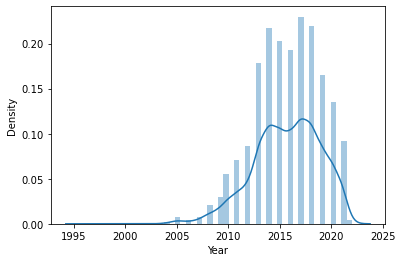

In [464]:
#Data visualization of the column
sns.distplot(df['Year'])

Next column we look into is the 'Location'

In [465]:
df['Location'].unique()

array(['HR', 'UP', 'DL', '2', '11', '10', 'N/', 'PB', 'KA', 'HP', 'GJ',
       'JK', 'PY', 'TS', 'AP', 'CH', 'JH', 'DK', 'MH', nan, 'UK', 'CG',
       'PN', 'HW', 'OD', 'BR', 'RJ', 'Dl', 'Delhi', 'Faridabad',
       'Gurgaon', 'Noida', 'Lucknow', 'Ghaziabad', 'Chandigarh', 'Mohali',
       'Agra', 'Dehradun'], dtype=object)

In [466]:
df['Location'] = df['Location'].replace({'Gurgaon':'HR', 'Chandigarh':'CH', 'Dehradun':'UK', 'Faridabad':'UP','Noida':'UP', 'Lucknow':'UP', 'Ghaziabad':'UP', 'Mohali':'UP', 'Agra':'UP', 'Delhi':'DL','Dl':'DL', 'HW':'HR', 'N/':'DL','10':'DL','11':'DL','2 ':'DL','DK':'DL'})

<AxesSubplot:xlabel='Location', ylabel='count'>

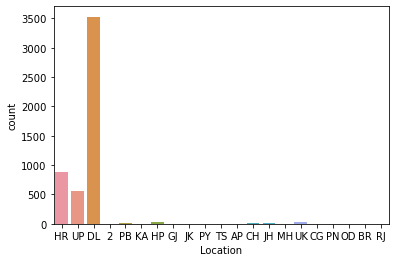

In [467]:
#Data visualization of the column
sns.countplot(df['Location'])

Next column we look into is the 'Ownership'

In [468]:
df['Ownership'].unique()

array(['1st', '2nd', 'First', 'Second', 'Third', 'Fourth', 'Unregistered',
       '3rd', '4th', '5th', '4 or More', 'UnRegistered Car', nan],
      dtype=object)

In [469]:
df['Ownership'] = df['Ownership'].replace({'1st':'1','First':'1','2nd':'2','Second':'2','3rd':'3','Third':'3','Fourth':'4+','4 or More':'4+','4th':'4+','5th':'4+','UnRegistered Car':'U','Unregistered':'U'})

<AxesSubplot:xlabel='Ownership', ylabel='count'>

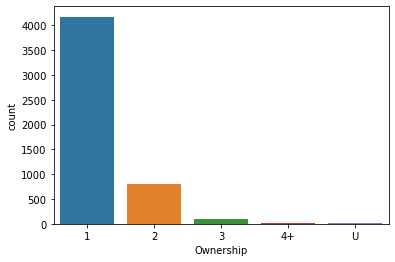

In [470]:
#Data visualization of the column
sns.countplot(df['Ownership'])

Next column we look into is the 'KM Driven'

In [471]:
df['KM Driven'].dtype

dtype('O')

We see that it is object type. Hence we shall convert into numerical value

In [472]:
for i in range(0,len(df['KM Driven'])):
    df['KM Driven'][i] = df['KM Driven'][i].replace(',','')

In [473]:
#Converting the column to integer type
df['KM Driven'] = df['KM Driven'].astype(int)

<AxesSubplot:xlabel='KM Driven', ylabel='Density'>

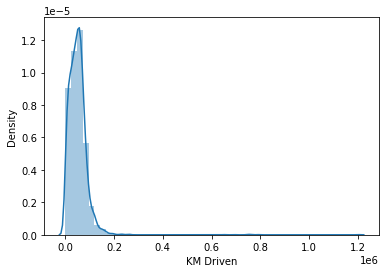

In [474]:
#Data visualization of the column
sns.distplot(df['KM Driven'])

Next column we look into is the 'Fuel'

In [475]:
df['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric(Battery)', 'LPG',
       'Petrol + CNG', 'Petrol + LPG', 'Hybrid'], dtype=object)

In [476]:
df['Fuel'] = df['Fuel'].replace({'Petrol + CNG':'CNG','LPG':'CNG','Petrol + LPG':'CNG'})

In [477]:
df['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric(Battery)', 'Hybrid'],
      dtype=object)

<AxesSubplot:xlabel='Fuel', ylabel='count'>

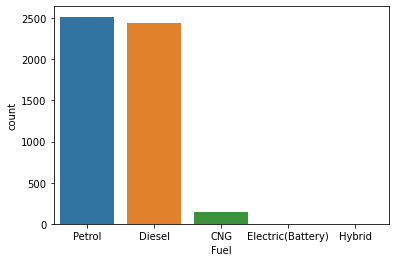

In [478]:
#Data visualization of the column
sns.countplot(df['Fuel'])

Next column we look into is the 'Transmission'

In [479]:
df['Transmission'].unique()

array(['Automatic', 'Manual', 'MANUAL', 'AUTOMATIC', nan], dtype=object)

In [480]:
df['Transmission'].value_counts()

Manual       2284
Automatic    1693
MANUAL        960
AUTOMATIC      91
Name: Transmission, dtype: int64

In [481]:
df['Transmission'] = df['Transmission'].replace({'AUTOMATIC':'Automatic','MANUAL':'Manual'})

<AxesSubplot:xlabel='Transmission', ylabel='count'>

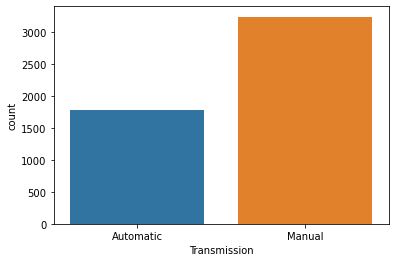

In [482]:
#Data visualization of the column
sns.countplot(df['Transmission'])

Dropping all the null values from the data set

In [483]:
#Dropping the rows with null values
df2 = df.dropna()

In [484]:
df2.isnull().sum()

Brand           0
Model           0
Variant         0
Year            0
Location        0
Ownership       0
KM Driven       0
Fuel            0
Transmission    0
Price           0
dtype: int64

In [485]:
print('Percentage loss of data =\t', ((df.shape[0]-df2.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 1.8580089966751419 %


Encoding all the categorical data

In [486]:
#Encoding data using LabelEncoder
le = LabelEncoder()
for i in df2.columns:
    if (i not in ['Year','KM Driven','Price']):
        df2[i] = le.fit_transform(df2[i])

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [487]:
df2.corr() #Correlation matrix

,Brand,Model,Variant,Year,Location,Ownership,KM Driven,Fuel,Transmission,Price
Brand,1.000000,0.130123,0.065576,0.034068,0.026849,-0.029931,0.066386,-0.069366,0.042888,0.008921
Model,0.130123,1.000000,0.246449,-0.095644,0.004943,0.013700,0.058425,-0.080409,0.115730,-0.122888
Variant,0.065576,0.246449,1.000000,0.005169,0.007606,-0.020570,-0.041508,0.055613,0.076462,-0.117869
Year,0.034068,-0.095644,0.005169,1.000000,0.003832,-0.283111,-0.448915,0.010187,-0.150516,0.349898
Location,0.026849,0.004943,0.007606,0.003832,1.000000,-0.002842,0.012080,0.014288,-0.033385,0.050369
Ownership,-0.029931,0.013700,-0.020570,-0.283111,-0.002842,1.000000,0.112221,-0.021110,0.021694,-0.042879
KM Driven,0.066386,0.058425,-0.041508,-0.448915,0.012080,0.112221,1.000000,-0.223740,0.111127,-0.220731
Fuel,-0.069366,-0.080409,0.055613,0.010187,0.014288,-0.021110,-0.223740,1.000000,0.003689,-0.109078
Transmission,0.042888,0.115730,0.076462,-0.150516,-0.033385,0.021694,0.111127,0.003689,1.000000,-0.286980
Price,0.008921,-0.122888,-0.117869,0.349898,0.050369,-0.042879,-0.220731,-0.109078,-0.286980,1.000000


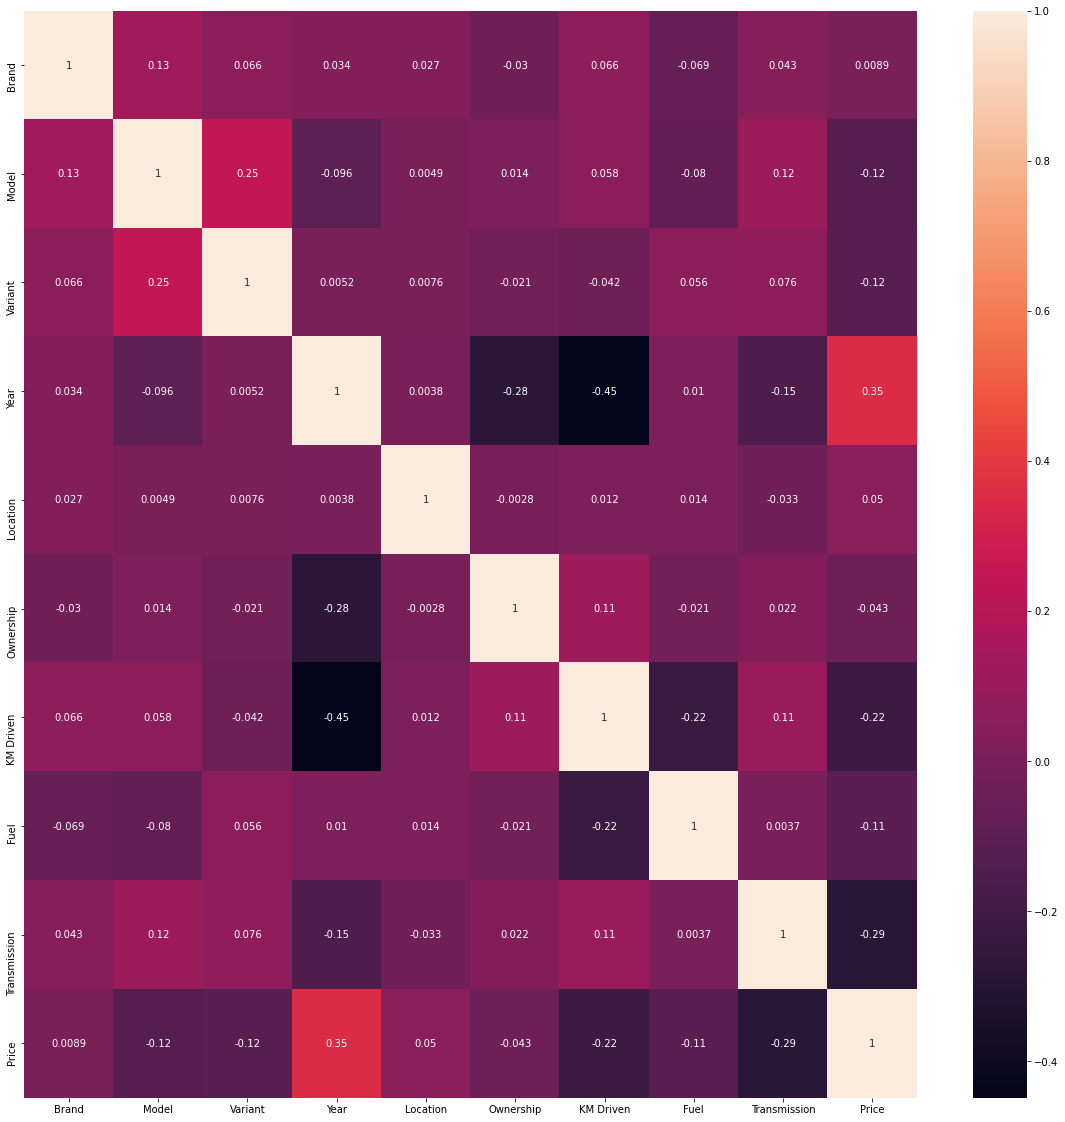

In [488]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True) 
plt.show()

In [489]:
#Correlation wrt target column
df2.corr()['Price'].sort_values()

Transmission   -0.286980
KM Driven      -0.220731
Model          -0.122888
Variant        -0.117869
Fuel           -0.109078
Ownership      -0.042879
Brand           0.008921
Location        0.050369
Year            0.349898
Price           1.000000
Name: Price, dtype: float64

We see that the column 'Year' has a high correlation to the target

# Skewness

Now, we split the data into feature and target columns

In [490]:
#Target = Price
x = df2.drop(columns='Price')
y = df2['Price']

In [491]:
for i in df2.columns:
    if (i in ['Year','KM Driven']):
        print(x[i].skew())

-0.5262272265450021
9.172380703966658


Treating skewness using sqrt method

In [492]:
for i in df2.columns:
    if (i in ['Year','KM Driven']):
        if np.abs(x[i].skew())>1:
            x[i] = np.sqrt(x[i])       

In [493]:
for i in df2.columns:
    if (i in ['Year','KM Driven']):
        print(x[i].skew())

-0.5262272265450021
0.8483025224835526


# Scaling the data for model

In [495]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Random State

In [510]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.3253665955269889
Random State: 	 73


Now since we got the best random state for data modelling, we create the test train models

In [511]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Model Predictions

Linear Regression

In [512]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 32.03908702544157
Mean Square Error : 	 2123486184354.144
Root Mean Square Error : 	 1457218.6467219475


KNN Regressor

In [513]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 47.58832150631967
Mean Square Error : 	 1637639494657.841
Root Mean Square Error : 	 1279702.8931192744


SUPPORT VECTOR MACHINES

In [514]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 -18.134801794437138
Mean Square Error : 	 3691204377960.791
Root Mean Square Error : 	 1921250.732715746


Random Forest Regressor

In [515]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 70.3309377218229
Mean Square Error : 	 927030569380.9155
Root Mean Square Error : 	 962824.2671333724


Decision Tree Regressor

In [516]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 22.763594152970732
Mean Square Error : 	 2413305436416.5845
Root Mean Square Error : 	 1553481.7142202172


XGB Regressor

In [521]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 81.22307028598064
Mean Square Error : 	 586698281219.9042
Root Mean Square Error : 	 765962.3236295008


Out of all the models Random Forest Regressor and XGB Regressor has the highest r2_score

# Cross validation

In [522]:
scr1 = cross_val_score(lr, x, y, cv=5, scoring='r2')
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 -0.5978985663900878


In [524]:
scr2 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr2.mean())

Cross validation score of Decision Tree Regressor is: 	 -1.2144155356648905


In [525]:
scr3 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr3.mean())

Cross validation score of Random Forest Regressor is: 	 0.2641424730770606


In [526]:
scr4 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr4.mean())

Cross validation score of KNeighbour Regressor is: 	 -0.3889670660932756


In [527]:
scr5 = cross_val_score(svr, x, y, cv=5)
print("Cross validation score of SVM is: \t", scr5.mean())

Cross validation score of SVM is: 	 -0.23368945257149734


In [529]:
scr6 = cross_val_score(xgb, x, y, cv=5)
print("Cross validation score of XGB is: \t", scr6.mean())

Cross validation score of XGB is: 	 0.14631444101172297


We see that the Random Forest Regressor performs the best in cross validation

# Hyper Parameter Tuning

In [530]:
GridSearchCV.get_params(rf)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [531]:
parameters = {'bootstrap': [True,False],
              'max_depth': [10, 20, None],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2,5,10],
              'n_estimators': [100,200]}

In [532]:
gcv = GridSearchCV(rf, parameters, cv=5, scoring='r2')

In [533]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [534]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy : 0.807585094828854


In [538]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.697963508574505

The best estimator gives the accuracy of 69.79% and hence we shall save previous model.

# Saving the best model

In [540]:
joblib.dump(rf,"Car_Price.pkl")

['Car_Price.pkl']